In [73]:
#Question 1

import yfinance as yf

def get_tesla_stock_data(start_date, end_date):
    # Define the ticker symbol for Tesla (TSLA)
    ticker_symbol = "TSLA"

    # Fetch historical data using yfinance
    tesla_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    return tesla_data

if __name__ == "__main__":
    # Define the start and end dates for the data
    start_date = "2022-01-01"
    end_date = "2023-01-01"

    # Get Tesla stock data
    tesla_stock_data = get_tesla_stock_data(start_date, end_date)

    # Print the data
    print(tesla_stock_data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  


In [95]:
#Question 2
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver

def get_tesla_revenue():
    # URL for Tesla's revenue on Yahoo Finance
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla-inc/revenue"

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome()

    try:
        # Open the URL in the Chrome browser
        driver.get(url)

        # Find the section containing revenue data
        revenue_section = driver.find_element_by_xpath("//div[@data-test='fin-col']")

        # Extract the column headers
        headers = [header.text.strip() for header in revenue_section.find_elements_by_xpath(".//span[@class='Va(m)']")]

        # Extract the revenue data
        rows = revenue_section.find_elements_by_xpath(".//div[@class='rw-expnded']")
        data = [row.text.strip().split('\n') for row in rows]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=headers)

        # Transpose the DataFrame for better formatting
        df = df.T.reset_index()

        # Rename columns using the first row
        df.columns = df.iloc[0]

        # Drop the first row
        df = df[1:]

        # Rename the 'Breakdown' column to 'Period'
        df = df.rename(columns={'Breakdown': 'Period'})

        return df

    finally:
        # Close the browser window when done
        driver.quit()

# Get Tesla revenue data
tesla_revenue_data = get_tesla_revenue()

# Display the DataFrame
print(tesla_revenue_data)


KeyboardInterrupt: 

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


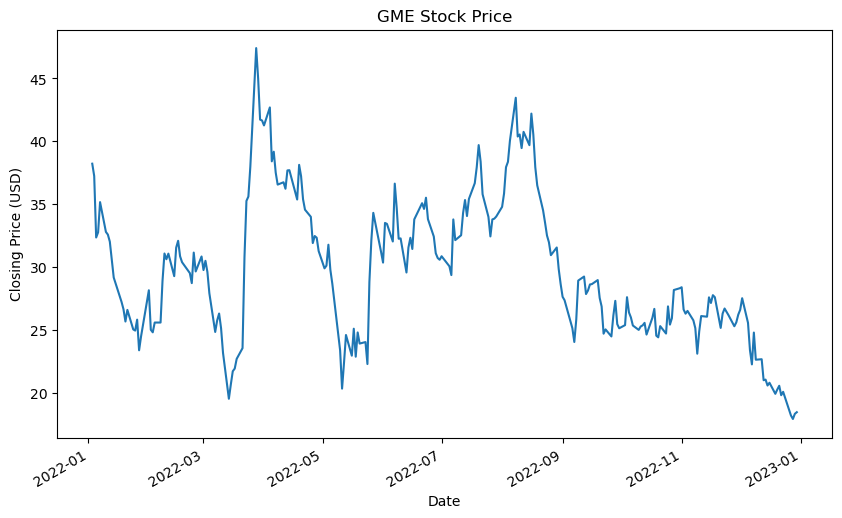

In [75]:
#Question 3
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbol (GameStop)
stock_symbol = "GME"

# Set the start and end dates for the historical data
start_date = "2022-01-01"
end_date = "2023-01-01"

# Download historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data
print(stock_data.head())

# Plotting the closing price
plt.figure(figsize=(10, 6))
stock_data['Close'].plot(title=f"{stock_symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

In [ ]:
#Question 4
import requests
from bs4 import BeautifulSoup
import pandas as pd
def get_tesla_revenue():
    # URL for Tesla's revenue on Yahoo Finance
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla-inc/revenue"

    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome()

    try:
        # Open the URL in the Chrome browser
        driver.get(url)

        # Find the section containing revenue data
        revenue_section = driver.find_element_by_xpath("//div[@data-test='fin-col']")

        # Extract the column headers
        headers = [header.text.strip() for header in revenue_section.find_elements_by_xpath(".//span[@class='Va(m)']")]

        # Extract the revenue data
        rows = revenue_section.find_elements_by_xpath(".//div[@class='rw-expnded']")
        data = [row.text.strip().split('\n') for row in rows]

        # Create a DataFrame
        df = pd.DataFrame(data, columns=headers)

        # Transpose the DataFrame for better formatting
        df = df.T.reset_index()

        # Rename columns using the first row
        df.columns = df.iloc[0]

        # Drop the first row
        df = df[1:]

        # Rename the 'Breakdown' column to 'Period'
        df = df.rename(columns={'Breakdown': 'Period'})

        return df

    finally:
        # Close the browser window when done
        driver.quit()

# Get Tesla revenue data
tesla_revenue_data = get_tesla_revenue()

# Display the DataFrame
print(tesla_revenue_data)

In [77]:
#Question 5
import pandas as pd
import yfinance as yf
import plotly.express as px

def get_revenue_data(stock_symbol, start_date, end_date):
    # Create a Ticker object for the stock
    stock_ticker = yf.Ticker(stock_symbol)

    # Get quarterly financials
    quarterly_financials = stock_ticker.quarterly_financials

    # Filter out non-date entries from the index
    quarterly_financials = quarterly_financials[quarterly_financials.index.to_series().str.match('\d{4}-\d{2}-\d{2}')]

    # Convert the index to datetime format
    quarterly_financials.index = pd.to_datetime(quarterly_financials.index)

    # Filter data for the desired date range
    financials = quarterly_financials.loc[start_date:end_date]

    # Reset index and format the period
    financials.reset_index(inplace=True)
    financials['Period'] = financials['index'].dt.strftime('%b %Y')

    # Print column names and data types
    print(financials.dtypes)

    # Identify the correct column name for revenue dynamically
    revenue_column_name = next((col for col in financials.columns if 'revenue' in str(col).lower()), None)

    if revenue_column_name is None:
        raise ValueError("No revenue column found in the dataset.")

    # Extract the revenue column
    revenue_data = financials[['Period', revenue_column_name]]

    return revenue_data

# Example: Get Tesla revenue data
tesla_revenue = get_revenue_data("TSLA", "2021-01-01", "2021-12-31")

# Example: Generate a bar chart for Tesla revenue
fig_revenue = px.bar(tesla_revenue, x='Period', y=tesla_revenue.columns[1],
                     title='Tesla Revenue (2021)', labels={'x': 'Period', 'y': 'Revenue'})

# Display the chart
fig_revenue.show()

index                  datetime64[ns]
2023-09-30 00:00:00            object
2023-06-30 00:00:00            object
2023-03-31 00:00:00            object
2022-12-31 00:00:00            object
2022-09-30 00:00:00            object
Period                         object
dtype: object


ValueError: No revenue column found in the dataset.

In [71]:
#Question 7
import pandas as pd
import yfinance as yf
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Function to get stock data
def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Function to get revenue data
def get_revenue_data(stock_symbol, start_date, end_date):
    stock_ticker = yf.Ticker(stock_symbol)
    quarterly_financials = stock_ticker.quarterly_financials
    quarterly_financials = quarterly_financials[quarterly_financials.index.to_series().str.match('\d{4}-\d{2}-\d{2}')]
    quarterly_financials.index = pd.to_datetime(quarterly_financials.index)
    financials = quarterly_financials.loc[start_date:end_date]
    financials.reset_index(inplace=True)
    financials['Period'] = financials['index'].dt.strftime('%b %Y')
    revenue_column_name = next((col for col in financials.columns if 'revenue' in str(col).lower()), None)
    if revenue_column_name is None:
        raise ValueError("No revenue column found in the dataset.")
    revenue_data = financials[['Period', revenue_column_name]]
    return revenue_data

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("GameStop Stock and Revenue Dashboard"),
    
    # Stock Price Graph
    dcc.Graph(id='stock-graph'),

    # Revenue Graph
    dcc.Graph(id='revenue-graph'),

    # Date Range Picker
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date='2021-01-01',
        end_date='2021-12-31'
    ),
])

# Callbacks to update graphs based on user input
@app.callback(
    Output('stock-graph', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_stock_graph(start_date, end_date):
    stock_data = get_stock_data("GME", start_date, end_date)
    fig_stock = px.line(stock_data, x=stock_data.index, y='Close', title='GameStop Stock Price')
    return fig_stock

@app.callback(
    Output('revenue-graph', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_revenue_graph(start_date, end_date):
    revenue_data = get_revenue_data("GME", start_date, end_date)
    fig_revenue = px.bar(revenue_data, x='Period', y=revenue_data.columns[1], title='GameStop Revenue',
                         labels={'x': 'Period', 'y': 'Revenue'})
    return fig_revenue

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

[*********************100%%**********************]  1 of 1 completed
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[71], line 25, in get_revenue_data(
    stock_symbol='GME',
    start_date='2021-01-01',
    end_date='2021-12-31'
)
     23 revenue_column_name = next((col for col in financials.columns if 'revenue' in str(col).lower()), None)
     24 if revenue_column_name is None:
---> 25     raise ValueError("No revenue column found in the dataset.")
     26 revenue_data = financials[['Period', revenue_column_name]]
     27 return revenue_data

ValueError: No revenue column found in the dataset.

